In [1]:
%pylab inline
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.python.keras.layers import Dropout

data = pd.read_csv('Data_corregido.csv',parse_dates=True)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


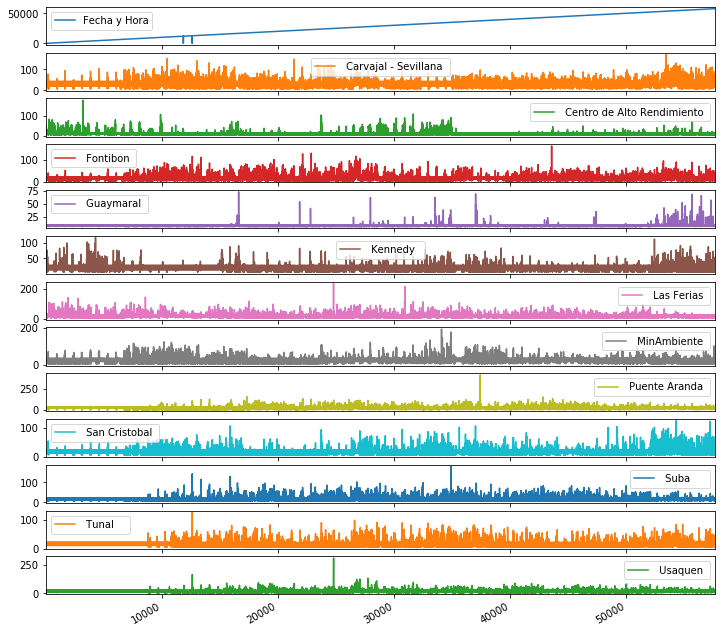

In [2]:
data.loc[1:].plot(subplots = True, figsize = (12,12));plt.legend(loc = 'best')

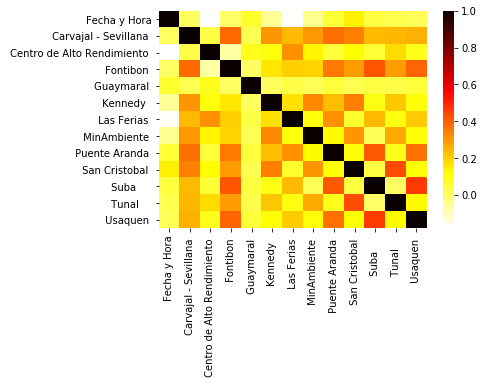

In [3]:
#Corelacion de los datos 
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, cmap='hot_r',
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,)

In [17]:
#Definiendo trains
X_train = data.loc[1:,['Fecha y Hora',' Puente Aranda ',' Centro de Alto Rendimiento ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values
y_train = data.loc[1:,' Centro de Alto Rendimiento '].astype(np.float32).values

In [18]:
#Normalizacion
from sklearn.preprocessing import StandardScaler

#definir scaler
scaler = StandardScaler().fit(X_train)

#scaler de train set
X_train = scaler.transform(X_train)

In [19]:
model = Sequential()

model.add(Dense(200,activation = 'relu', input_shape=(9,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               2000      
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 27,201
Trainable params: 27,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'Adam',
             metrics = ['mae', 'acc'])
history = model.fit( X_train, y_train, epochs = 20,batch_size = 24 ,verbose = 1) #

Epoch 1/20
57647/57647 [==============================] - 7s 122us/step - loss: 2.4734 - mean_absolute_error: 0.4983 - acc: 0.3537
Epoch 2/20
57647/57647 [==============================] - 7s 117us/step - loss: 0.0256 - mean_absolute_error: 0.1096 - acc: 0.4275
Epoch 3/20
57647/57647 [==============================] - 7s 122us/step - loss: 0.0284 - mean_absolute_error: 0.1047 - acc: 0.4238
Epoch 4/20
57647/57647 [==============================] - 7s 117us/step - loss: 0.0296 - mean_absolute_error: 0.0676 - acc: 0.4275
Epoch 5/20
57647/57647 [==============================] - 7s 123us/step - loss: 0.0151 - mean_absolute_error: 0.0751 - acc: 0.4287
Epoch 6/20
57647/57647 [==============================] - 7s 121us/step - loss: 0.0111 - mean_absolute_error: 0.0581 - acc: 0.4302
Epoch 7/20
57647/57647 [==============================] - 6s 105us/step - loss: 0.0074 - mean_absolute_error: 0.0539 - acc: 0.4324
Epoch 8/20
57647/57647 [==============================] - 6s 104us/step - loss: 0.0

In [8]:
y_pred = model.predict(X_train)
y_pred[:10]

array([[12.087927],
       [11.592342],
       [11.666367],
       [11.295841],
       [11.472613],
       [12.622386],
       [15.532762],
       [20.246315],
       [21.877914],
       [20.886337]], dtype=float32)

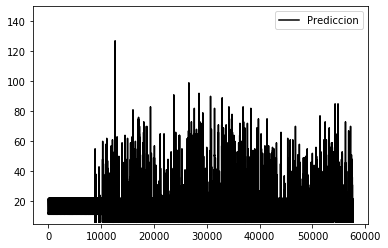

In [9]:
plot(data.loc[1:].index,y_pred,label='Prediccion', color = 'black')
#data[' Carvajal - Sevillana '].loc['01/01/13 12:00 AM':'10/20/18 07:00 PM'].plot(ls="dotted", color = 'orange')
figsize(12,8)
ylim(5,150)
legend(loc='best')

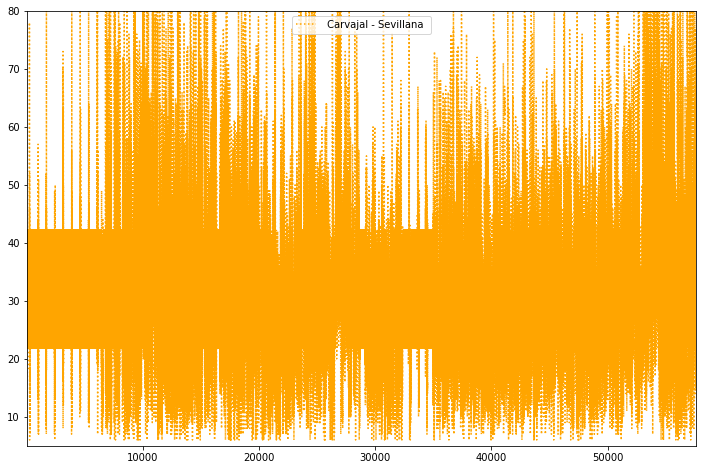

In [10]:
#plot(data.loc['01/01/13 12:00 AM':'10/20/18 07:00 PM'].index,y_pred,label='Prediccion', color = 'black')
data[' Carvajal - Sevillana '].loc[1:].plot(ls="dotted", color = 'orange')
figsize(12,8)
ylim(5,80)
legend(loc='best')

Text(0.5, 1.0, 'Epocas Vs ECM')

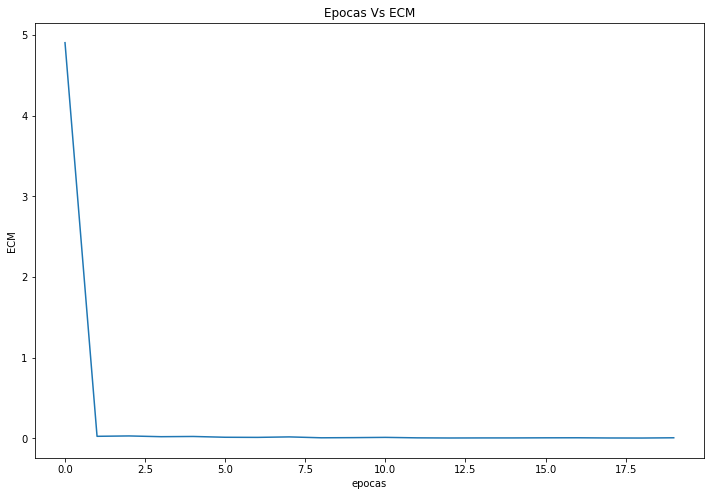

In [11]:
plot(history.history['loss'])
plt.xlabel('epocas')
plt.ylabel('ECM')
plt.title('Epocas Vs ECM')

In [21]:
model.save('Model_Cen.h5')
model.save_weights('Pesos_Cen.h5')

In [13]:
x_test = data.loc[57600:57623,[' Tunal    ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana ']].astype(np.float32).values

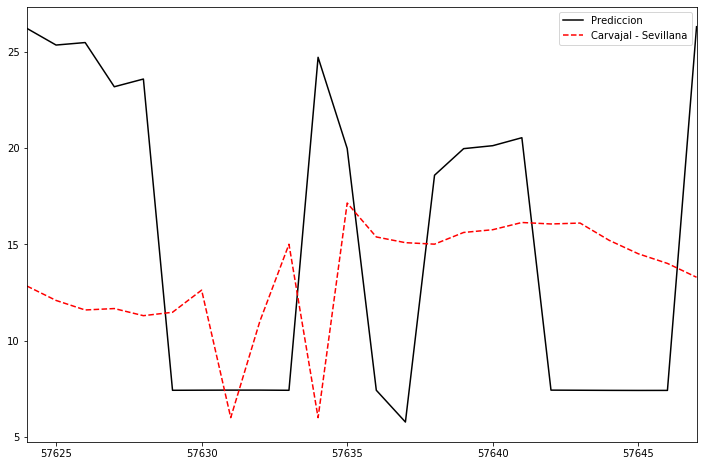

In [14]:
ax = np.arange(57624,57648)
#ay = data[' Puente Aranda ',' Las Ferias ',' San Cristobal ',' Kennedy  ',' Usaquen ',' MinAmbiente ',' Suba     ',' Carvajal - Sevillana '].loc[57600:57623]
x = pd.DataFrame(np.column_stack((ax,x_test)))

#definir scaler
scaler = StandardScaler().fit(x)

#scaler de test set
x = scaler.transform(x)

test = model.predict(x, batch_size=24)

plot(data.loc[57624:57648].index,test,label='Prediccion', color = 'black')
data[' Tunal    '].loc[57624:57648].plot(ls="--",color = 'r', label='Carvajal - Sevillana')
plt.legend(loc = 'best')

In [15]:
real = data[' Carvajal - Sevillana '].loc[57624:57648].astype(np.float32).values
test1 = np.transpose(test)
print(np.corrcoef(real,test1))

[[ 1.         -0.44196331]
 [-0.44196331  1.        ]]


In [16]:
test1

array([[26.203316 , 25.33936  , 25.468735 , 23.174603 , 23.57506  ,
         7.419891 ,  7.4246078,  7.4282017,  7.4283442,  7.419963 ,
        24.7034   , 19.97071  ,  7.4213223,  5.771864 , 18.581797 ,
        19.961987 , 20.115643 , 20.529427 ,  7.427907 ,  7.4215455,
         7.4156175,  7.4124346,  7.413857 , 26.292267 ]], dtype=float32)